# Bayesian Neural Networks to Predict Hard Landing with DASHlink Data
Authors: Dr. Yingxiao Kong, Vanderbilt University

Email: yingxiao.kong@vanderbit.edu

## Overview of Research
In this work, we use an open-source dataset - [NASA's DASHlink data](https://c3.ndc.nasa.gov/dashlink/) - to isolate data for landing aircraft that both have hard landing and normal landing occurrences. The objective is to use [this sample data](https://c3.ndc.nasa.gov/dashlink/projects/85/resources/?type=ds) to train a Bayesian Neural Network model to predict touchdown vertical speed for a landing aircraft with the intent to use as a screening for identifying hard landing events before they occur.

This series of Jupyter notebook demonstrations into 3 modules. The presented module is in **bold**:
- **Module 1 - Download DASHlink Data**
- Module 2 - DASHlink Data Pre-Processing and Feature Selection with Maximum Relevance and Minimum Reduandancy (MRMR)
- Module 3 - Bayesian Neural Network Model Training

## Installing the required Python packages

The required Python packages for this module are:
- ***```wget```***
- ***```zipfile```***
- ***```scipy```***

In the Ubuntu or Anaconda terminal, execute ```conda install scipy zipfile```. However, the correct version of ```wget``` can only be installed with ```pip``` so execute ```pip install wget```. 

# Module 1 - Download DASHlink Data
We will be using the Sample Flight Data from the DASHlink dataset contained [here](https://c3.ndc.nasa.gov/dashlink/projects/85/resources/?type=ds). Each dataset consists of multiple zip files containing individual flight recorded data in Matlab file (```.mat```) format. 

## Step 1: Import and Instantiate ```DASHlinkDownloader``` class

In [14]:
from dataUtils import DASHlinkDownloader

BASE_URL = 'https://c3.ndc.nasa.gov/dashlink/static/media/dataset/'

downloader = DASHlinkDownloader(BASE_URL,remove_zip=True)

## Step 2: Define DASHlink .zip Files to Download
There are 35 datasets contained for different "tail numbers" sequentially ordered from 652 to 687. Here, we analyze the contents of ```TAIL_NO=687```. Within each dataset are up to 9 zip files that we aim to download.  

In [16]:
TAIL_NO = 687
ZIP_FILES=['Tail_{}_{}.zip'.format(TAIL_NO,i) for i in range(1,9+1)]
print(ZIP_FILES)

['Tail_687_1.zip', 'Tail_687_2.zip', 'Tail_687_3.zip', 'Tail_687_4.zip', 'Tail_687_5.zip', 'Tail_687_6.zip', 'Tail_687_7.zip', 'Tail_687_8.zip', 'Tail_687_9.zip']


## Step 3: Specify Download Path relative to Local Directory

In [17]:
OUTPUT_DIRECTORY = r'../../../dashlink-data'

## Step 4: Use ```download_zip``` and ```unzip``` functions

In [13]:
for zf in ZIP_FILES:
    ### download the zipped file
    zipfile = downloader.download_zip(zf,output_directory=OUTPUT_DIRECTORY)
    fname = downloader.unzip(zipfile)

zipfile name again: ../../../dashlink-data/Tail_687_1.zip
folder name: ../../../dashlink-data/Tail_687_1
zipfile name again: ../../../dashlink-data/Tail_687_2.zip
folder name: ../../../dashlink-data/Tail_687_2
zipfile name again: ../../../dashlink-data/Tail_687_3.zip
folder name: ../../../dashlink-data/Tail_687_3
zipfile name again: ../../../dashlink-data/Tail_687_4.zip
folder name: ../../../dashlink-data/Tail_687_4
zipfile name again: ../../../dashlink-data/Tail_687_5.zip
folder name: ../../../dashlink-data/Tail_687_5
zipfile name again: ../../../dashlink-data/Tail_687_6.zip
folder name: ../../../dashlink-data/Tail_687_6
zipfile name again: ../../../dashlink-data/Tail_687_7.zip
folder name: ../../../dashlink-data/Tail_687_7
100% [......................................................................] 837830084 / 837830084zipfile name again: ../../../dashlink-data/Tail_687_8.zip
folder name: ../../../dashlink-data/Tail_687_8
100% [.......................................................

## Step 5: View Contents of a ```.mat``` file

In [73]:
import glob
downloaded_mat_files = glob.glob(OUTPUT_DIRECTORY+'/**/*.mat',recursive=True)
mat_file = downloaded_mat_files[2] ## File known to have 'PH' == 7 (landing rollout phase)
print(mat_file)

../../../dashlink-data/Tail_687_8/687200312300437.mat


In [68]:
import scipy.io as scio
data = scio.loadmat(mat_file)
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Tue Jan 28 10:38:33 2014',
 '__version__': '1.0',
 '__globals__': [],
 'VAR_1107': array([[(array([[584],
                [584],
                [584],
                [584],
                [584],
                [584],
                [584],
                [584],
                [584],
                [584],
                [584],
                [584],
                [584],
                [584],
                [584],
                [584],
                [584],
                [584],
                [584],
                [584],
                [584],
                [584],
                [584],
                [584],
                [584],
                [584],
                [584],
                [584],
                [584],
                [584],
                [584],
                [584],
                [584],
                [584],
                [584],
                [584],
                [584

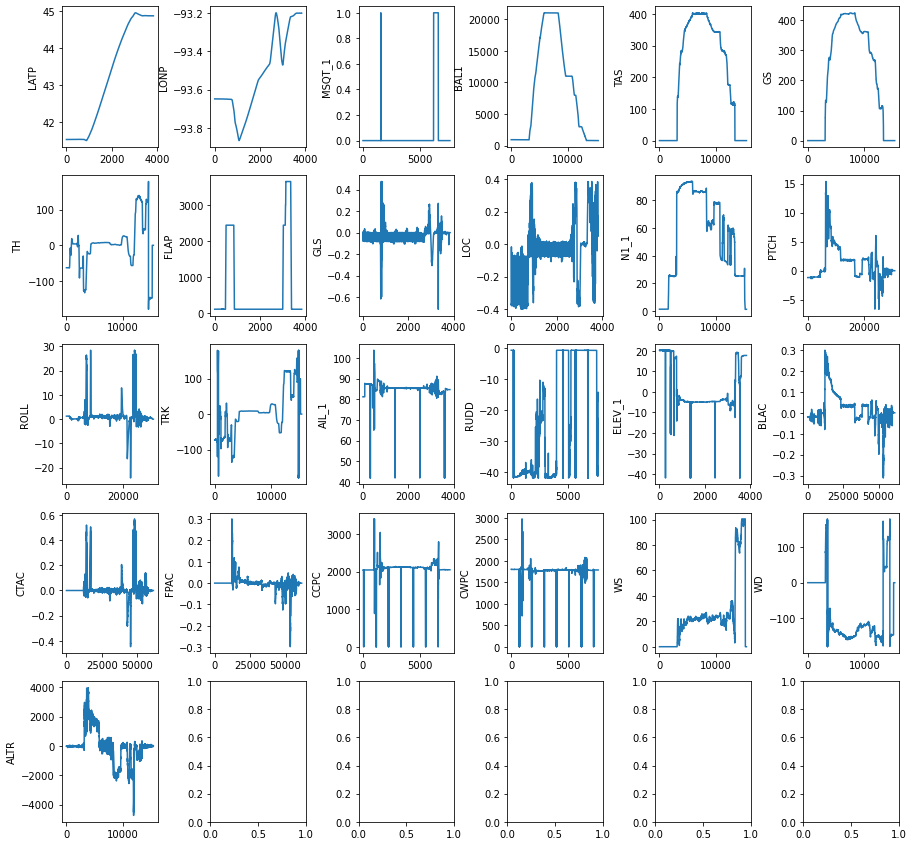

In [72]:
keys=['LATP','LONP','MSQT_1','BAL1','TAS','GS','TH','FLAP','GLS','LOC','N1_1','PTCH','ROLL','TRK','AIL_1','RUDD','ELEV_1',\
      'BLAC','CTAC','FPAC','CCPC','CWPC','WS','WD','ALTR']

import matplotlib.pyplot as plt
fig,axes = plt.subplots(5,6,figsize=(15,15))
axes = axes.flatten()
for i,key in enumerate(keys):
    ax = axes[i]
    ax.plot(data[key][0][0][0])
    ax.set_ylabel(key)
fig.subplots_adjust(wspace=0.55)